# XGB Modeling and hyperparameter tuning




In [6]:
import pandas as pd
import plotly
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import timeit
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings(action='once')

In [7]:
df = pd.read_csv('/Users/ej7793/Documents/FlightDelay/Data/feature_engineered.csv')

In [8]:
df.describe()

,Saturday,Tuesday_Wednesday,CARRIER_rank,ORIGIN_rank,DEST_rank,LATE_NIGHT,DEP_HOUR_rank,DEP_DEL15,ARR_DEL15
count,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000,599235.000000
mean,0.106010,0.287562,6.354168,3.474976,3.052632,0.038092,3.283166,0.135917,0.137317
std,0.307851,0.452626,4.872752,2.177318,2.288243,0.191418,2.106907,0.342700,0.344182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,6.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,0.000000,1.000000,10.000000,5.000000,4.000000,0.000000,5.000000,0.000000,0.000000
max,1.000000,1.000000,16.000000,9.000000,9.000000,1.000000,9.000000,1.000000,1.000000


In [9]:
df.dtypes

Saturday               int64
Tuesday_Wednesday      int64
CARRIER_rank           int64
ORIGIN_rank          float64
DEST_rank            float64
LATE_NIGHT             int64
DEP_HOUR_rank          int64
DEP_DEL15            float64
ARR_DEL15            float64
dtype: object

In [10]:
df.columns

Index(['Saturday', 'Tuesday_Wednesday', 'CARRIER_rank', 'ORIGIN_rank',
       'DEST_rank', 'LATE_NIGHT', 'DEP_HOUR_rank', 'DEP_DEL15', 'ARR_DEL15'],
      dtype='object')

In [11]:
df = df.sample(100000)

X_train, X_final_test = train_test_split(df,test_size=0.2, random_state= 2)
X_final_test.to_csv('../Data/testing_dataset.csv', index = False)
## within the training dataset, split the data into training dataset and testing/validation dataset
X_train, X_test = train_test_split(X_train,test_size=0.2, random_state= 2)
print('records in training dataset')
print(len(X_train))
print('records in validation dataset')
print(len(X_test))
print('records in final testing dataset')
print(len(X_final_test))

records in training dataset
64000
records in validation dataset
16000
records in final testing dataset
20000


In [12]:
predictors = ['Saturday', 'Tuesday_Wednesday', 'CARRIER_rank', 'ORIGIN_rank',
       'DEST_rank', 'LATE_NIGHT', 'DEP_HOUR_rank', 'DEP_DEL15']
target = 'ARR_DEL15'


In [32]:
def modelfit(estimator,data_train,data_test,predictors,target):
    start = timeit.default_timer()
    #fitting model
    estimator.fit(data_train[predictors],data_train.loc[:,target])
    #train data prediction
    start1 = timeit.default_timer()
    train_pred=estimator.predict(data_train[predictors])
    stop1 = timeit.default_timer()
    #cross_validation score
    cv_score=cross_val_score(estimator,data_train[predictors],data_train.loc[:,target],cv=5,scoring='precision')

    #Print model report:
    print ("\nModel Report")
    print ("Accuracy on Train Data: %.4g" % metrics.accuracy_score(data_train.loc[:,target].values, train_pred))
    print ("Precision on Train Data: %.4g" % metrics.precision_score(data_train.loc[:,target].values, train_pred))
    print ("Recall on Train Data: %.4g" % metrics.recall_score(data_train.loc[:,target].values, train_pred))
    print ("F1 score on Train Data: %.4g" % metrics.f1_score(data_train.loc[:,target].values, train_pred))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    start2 = timeit.default_timer()
    test_pred=estimator.predict(data_test[predictors])
    stop2 = timeit.default_timer()
    print ("Accuracy on Test Data: %.4g" % metrics.accuracy_score(data_test.loc[:,target].values, test_pred))  
    print ("Precision on Test Data: %.4g" % metrics.precision_score(data_test.loc[:,target].values, test_pred)) 
    print ("Recall on Test Data: %.4g" % metrics.recall_score(data_test.loc[:,target].values, test_pred)) 
    print ("F1 score on Test Data: %.4g" % metrics.f1_score(data_test.loc[:,target].values, test_pred)) 
    stop = timeit.default_timer()
    print('Total Time: ', stop - start)
    print('training time: ', stop1 - start1)
    print('testing time: ', stop2 - start2)
    return test_pred


In [14]:
X_test.ARR_DEL15.value_counts(normalize =True)

0.0    0.866625
1.0    0.133375
Name: ARR_DEL15, dtype: float64

## Helper functions

In [15]:
## create learning curve ploting function

from sklearn.model_selection import learning_curve
##learning curve
# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
def plot_learning_curve(alg, X, y, scoring_metric, algorithm_name):
    sizes, training_scores, testing_scores = learning_curve(alg, X, y, cv=5, scoring= scoring_metric, train_sizes=np.linspace(0.01, 1.0, 30))

    # Mean and Standard Deviation of training scores
    mean_training = np.mean(training_scores, axis=1)
    Standard_Deviation_training = np.std(training_scores, axis=1)

    # Mean and Standard Deviation of testing scores
    mean_testing = np.mean(testing_scores, axis=1)
    Standard_Deviation_testing = np.std(testing_scores, axis=1)

    # dotted blue line is for training scores and green line is for cross-validation score
    plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
    plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

    # Drawing plot
    plt.title("LEARNING CURVE FOR %s" % algorithm_name)
    plt.xlabel("Training Set Size"), plt.ylabel("%s Score" % scoring_metric), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return

In [16]:
# create validation curve ploting function


 
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
def plot_validation_curve(alg,X, y, param_name, parameter_range, scoring_metric, algorithm_name):
    train_score, test_score = validation_curve(alg, X, y,
                                           param_name = param_name,
                                           param_range = parameter_range,
                                            cv = 5, scoring = scoring_metric)

    # Calculating mean and standard deviation of training score
    mean_train_score = np.mean(train_score, axis = 1)
    std_train_score = np.std(train_score, axis = 1)

    # Calculating mean and standard deviation of testing score
    mean_test_score = np.mean(test_score, axis = 1)
    std_test_score = np.std(test_score, axis = 1)

    # Plot mean accuracy scores for training and testing scores
    plt.plot(parameter_range, mean_train_score,
         label = "Training Score", color = 'b')
    plt.plot(parameter_range, mean_test_score,
       label = "Cross Validation Score", color = 'g')

    # Creating the plot
    plt.title("Validation Curve with %s" % algorithm_name)
    plt.xlabel("%s" % param_name)
    plt.ylabel("%s" % scoring_metric)
    plt.tight_layout()
    plt.legend(loc = 'best')
    plt.show()
    return

## Modeling

In [17]:
## sampling data to cut down run time 
X_train_test = X_train.sample(50000)
X = X_train_test[predictors]
y = X_train_test[target]

## XGBoost

**Baseline Model**

In [18]:
##Gradient Boosting 
from xgboost import XGBClassifier
warnings.simplefilter('ignore')
xgb = XGBClassifier(eval_metric="error",random_state = 1)
y_pred=modelfit(xgb, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.934
Precision on Train Data: 0.7727
Recall on Train Data: 0.7414
F1 score on Train Data: 0.7567
CV Score : Mean - 0.7392 | Std - 0.006112 | Min - 0.7299 | Max - 0.7471
Accuracy on Test Data: 0.931
Precision on Test Data: 0.7522
Recall on Test Data: 0.7198
F1 score on Test Data: 0.7356
Time:  5.528841332998127


**Learning curve**

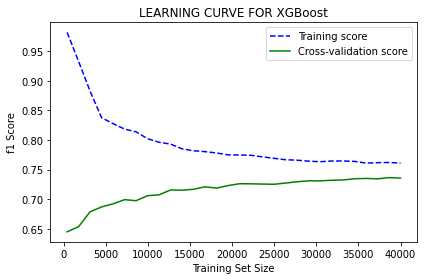

In [15]:
plot_learning_curve(xgb, X, y, 'f1', 'XGBoost')

**Validation curve**

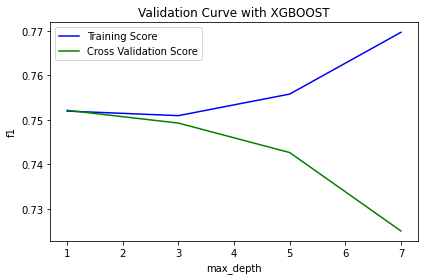

In [16]:
##Max_depth
## clearly the training score and cross validation score diverges as max_depth increases
parameter_range = [1,3,5,7]
plot_validation_curve(xgb ,X, y, "max_depth", parameter_range, "f1", 'XGBOOST')

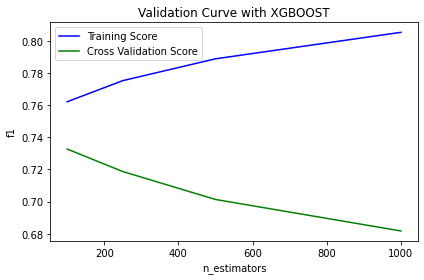

In [20]:
##n_estimators
parameter_range = [100, 250, 500, 1000]
plot_validation_curve(xgb ,X, y, "n_estimators", parameter_range, "f1", 'XGBOOST')

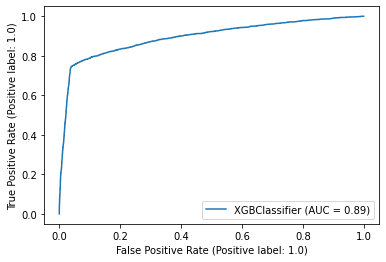

In [18]:
## ROC curve
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve

plot_roc_curve(xgb, X_test[predictors], X_test[target])

**Grid search for best hyperparameter set**

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
              'max_depth': [1, 3, 5, 7],
              'n_estimators': [100, 250, 500, 1000]}
grid_lr = GridSearchCV(estimator =xgb, param_grid= param_grid, scoring='f1', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X_train_test[predictors],X_train_test[target])

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='error',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=12,
                                     num_parallel_tree=1, random_state=1,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
      

In [25]:
print(grid_lr.best_estimator_)

print(grid_lr.best_params_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
{'max_depth': 1, 'n_estimators': 100}


**New model after hyperparameter tuning**

In [26]:
xgb_tuned = grid_lr.best_estimator_


In [33]:
y_pred=modelfit(xgb_tuned, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9314
Precision on Train Data: 0.7546
Recall on Train Data: 0.7475
F1 score on Train Data: 0.7511
CV Score : Mean - 0.7547 | Std - 0.005997 | Min - 0.7459 | Max - 0.7633
Accuracy on Test Data: 0.9319
Precision on Test Data: 0.7485
Recall on Test Data: 0.7376
F1 score on Test Data: 0.743
Total Time:  2.383593420992838
training time:  0.01664886699290946
testing time:  0.008047736992011778


In [34]:
## compare with before hyper parameter tuning 
y_pred=modelfit(xgb, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.934
Precision on Train Data: 0.7727
Recall on Train Data: 0.7414
F1 score on Train Data: 0.7567
CV Score : Mean - 0.7568 | Std - 0.006619 | Min - 0.7485 | Max - 0.7666
Accuracy on Test Data: 0.931
Precision on Test Data: 0.7522
Recall on Test Data: 0.7198
F1 score on Test Data: 0.7356
Total Time:  10.8770351580024
training time:  0.04124993900768459
testing time:  0.01851115599856712


**ROC curve after hyper parameter tuning**

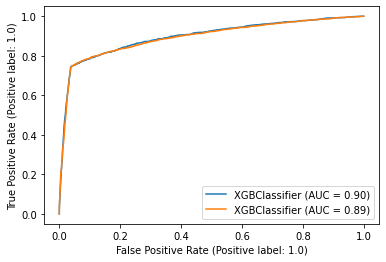

In [32]:
disp = plot_roc_curve(xgb_tuned, X_test[predictors], X_test[target])
plot_roc_curve(xgb,X_test[predictors], X_test[target], ax= disp.ax_);

**Learning curve after hyper parameter tuning** 

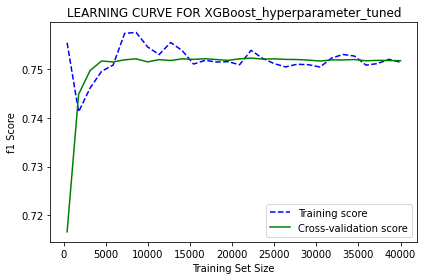

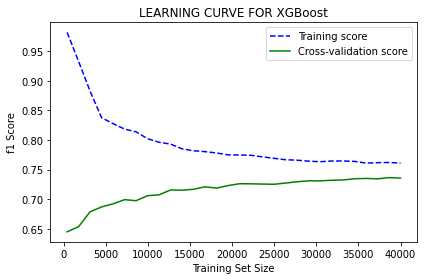

In [29]:
disp = plot_learning_curve(xgb_tuned, X, y, 'f1', 'XGBoost_hyperparameter_tuned')
plot_learning_curve(xgb, X, y, 'f1', 'XGBoost');

## Final prediction results and performance 

In [35]:
y_pred=modelfit(xgb_tuned, X_train, X_final_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9314
Precision on Train Data: 0.7546
Recall on Train Data: 0.7475
F1 score on Train Data: 0.7511
CV Score : Mean - 0.7547 | Std - 0.005997 | Min - 0.7459 | Max - 0.7633
Accuracy on Test Data: 0.9351
Precision on Test Data: 0.7659
Recall on Test Data: 0.7612
F1 score on Test Data: 0.7635
Total Time:  3.1918278990051476
training time:  0.022711673998855986
testing time:  0.010467856001923792


**Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
y_pred=modelfit(cart, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.952
Precision on Train Data: 0.9159
Recall on Train Data: 0.7037
F1 score on Train Data: 0.7959
CV Score : Mean - 0.7218 | Std - 0.007682 | Min - 0.714 | Max - 0.735
Accuracy on Test Data: 0.9128
Precision on Test Data: 0.7382
Recall on Test Data: 0.5643
F1 score on Test Data: 0.6396
Time:  0.555070176000072


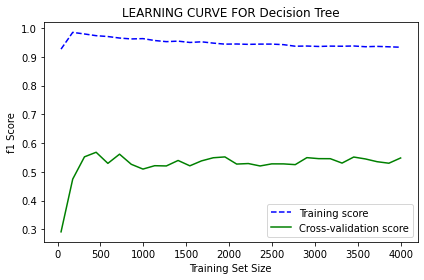

In [34]:
## learning curve
plot_learning_curve(cart, X, y, 'f1', 'Decision Tree')

validation curve and hyperparameter tuning 

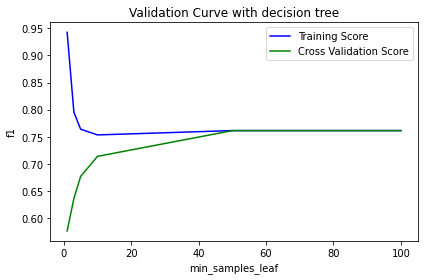

In [69]:
parameter_range = [1, 3, 5, 10, 50, 100]
plot_validation_curve(cart ,X, y, "min_samples_leaf", parameter_range, "f1", 'decision tree')

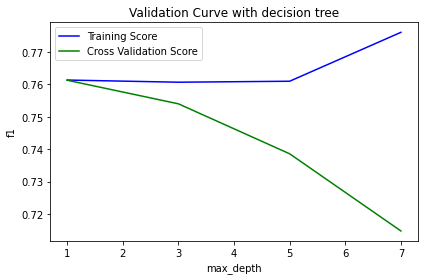

In [71]:
parameter_range = [1, 3, 5, 7]
plot_validation_curve(cart ,X, y, "max_depth", parameter_range, "f1", 'decision tree')

In [73]:
## hyperparameter tuning 
##GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
              'max_depth': [1, 3, 5, 7],
              'min_samples_leaf': [1, 3, 5, 10, 50, 100]}
grid_lr = GridSearchCV(estimator =cart, param_grid= param_grid, scoring='f1', 
                        refit=True, return_train_score=True) 
grid_lr.fit(X_train_test[predictors],X_train_test[target])

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 10, 50, 100]},
             return_train_score=True, scoring='f1')

In [74]:
print(grid_lr.best_estimator_)

print(grid_lr.best_params_)

DecisionTreeClassifier(max_depth=1)
{'max_depth': 1, 'min_samples_leaf': 1}


In [78]:
#without hyperparameter tuning
cart = DecisionTreeClassifier()
y_pred=modelfit(cart, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.952
Precision on Train Data: 0.9159
Recall on Train Data: 0.7037
F1 score on Train Data: 0.7959
CV Score : Mean - 0.7229 | Std - 0.005971 | Min - 0.7179 | Max - 0.7342
Accuracy on Test Data: 0.9135
Precision on Test Data: 0.7405
Recall on Test Data: 0.5684
F1 score on Test Data: 0.6431
Time:  0.5639916850013833


In [77]:
#with hyperparameter tuning
cart = DecisionTreeClassifier(max_depth =1, min_samples_leaf=1)
y_pred=modelfit(cart, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9328
Precision on Train Data: 0.7514
Recall on Train Data: 0.7396
F1 score on Train Data: 0.7454
CV Score : Mean - 0.7513 | Std - 0.006805 | Min - 0.7425 | Max - 0.7617
Accuracy on Test Data: 0.9329
Precision on Test Data: 0.7602
Recall on Test Data: 0.7457
F1 score on Test Data: 0.7529
Time:  0.25282145100027265


**Neural network with SK-learn MLP** 

In [36]:
from sklearn.neural_network import MLPClassifier

alg9 = MLPClassifier(random_state=1)
y_pred=modelfit(alg9, X_train, X_test,predictors,target)


Model Report
Accuracy on Train Data: 0.9316
Precision on Train Data: 0.7567
Recall on Train Data: 0.7454
F1 score on Train Data: 0.751
CV Score : Mean - 0.7563 | Std - 0.004959 | Min - 0.7491 | Max - 0.7638
Accuracy on Test Data: 0.9314
Precision on Test Data: 0.7476
Recall on Test Data: 0.7329
F1 score on Test Data: 0.7402
Total Time:  96.50007993899635
training time:  0.10179952000908088
testing time:  0.02959965998888947
